In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

from tensorflow.keras import Model, metrics
from tensorflow.keras.layers import Dense, Dropout, Input

# Set the seeds
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

2022-08-05 16:13:51.091822: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-05 16:13:51.091856: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dataset = pd.read_csv('train.csv')

features = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea', 'MSSubClass', 'TotalBsmtSF']
data = dataset[features]

# Filling nan with the mean of the column:
data = data.fillna(data.mean())

# Extract input values and normalize
x = data[features[1:]]
scale = StandardScaler()
x = scale.fit_transform(x)

# Extract output values (prices) and normalize
y = data[features[0]].values
y = y/100000

# Split into 75% for train and 25% for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed_value)

In [3]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, np.array(h['mean_absolute_error'])*1e5, '.-',
                               epochs, np.array(h['val_mean_absolute_error'])*1e5, '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('MAE')
    plt.legend(['Train', 'Validation'])
        
    print('Train MAE     ', h['mean_absolute_error'][-1]*1e5)
    print('Validation MAE', h['val_mean_absolute_error'][-1]*1e5)

In [4]:
inputs = Input(shape=x.shape[1])
outputs1 = Dense(7, activation='relu')(inputs)
outputs2 = Dense(7, activation='relu')(outputs1)
outputs3 = Dense(7, activation='relu')(outputs2)
outputs4 = Dense(7, activation='relu')(outputs3)
outputs5 = Dense(7, activation='relu')(outputs4)
outputs6 = Dense(1, activation='linear')(outputs5)
model = Model(inputs, outputs6)

model.compile(optimizer ='adam', loss ='mean_squared_error', metrics =[metrics.mae])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 7)                 63        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 1)                 8     

2022-08-05 16:13:56.241893: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-05 16:13:56.241927: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-05 16:13:56.241949: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Elias): /proc/driver/nvidia/version does not exist
2022-08-05 16:13:56.242228: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Train MAE      17407.280206680298
Validation MAE 19730.886816978455


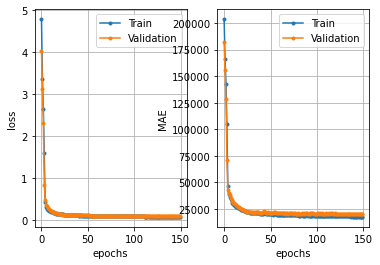

In [5]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=32, verbose=0)
plot_history(history)